In [34]:
#matplotlib inline
import torch
from torch import nn
from d2l import torch as d2l

In [35]:
# 生成一些随机数据
n_train, n_test, num_inputs, batch_size = 20, 100, 200, 5
true_w, true_b = torch.ones((num_inputs, 1)) * 0.01, 0.05
train_data = d2l.synthetic_data(true_w, true_b, n_train)
train_iter = d2l.load_array(train_data, batch_size, is_train=True)
test_data = d2l.synthetic_data(true_w, true_b, n_test)
test_iter = d2l.load_array(test_data, batch_size, is_train=False)

In [36]:
### 实现权重衰减，也就是将L2的平方罚函数添加到原始目标函数中

In [37]:
# 随机初始化模型参数
def init_params():
    w = torch.normal(0, 1, size=(num_inputs, 1), requires_grad=True)
    b = torch.zeros(1, requires_grad=True)
    return [w, b]

In [38]:
# 定义L2罚函数
def l2_penalty(w):
    return torch.sum(abs(w))

In [39]:
# 将模型拟合训练数据集，并且在测试集上进行评估
def train(lambd):
    w, b = init_params()
    net, loss = lambda X: d2l.linreg(X, w, b), d2l.squared_loss
    num_epochs, lr = 300, 0.003
    animator = d2l.Animator(xlabel='epochs', ylabel='loss', yscale='log', xlim=[5, num_epochs], legend=['train', 'test'])
    for epoch in range(num_epochs):
        for X, y in train_iter:
            # 增加了L2罚函数
            # broadcast机制使得l2_penalty(w)成为一个长度为batch_size的向量
            l = loss(net(X), y) + lambd * l2_penalty(w)
            l.sum().backward()
            d2l.sgd([w, b], lr, batch_size)
        if (epoch + 1) % 5 == 0:
            animator.add(epoch + 1, (d2l.evaluate_loss(net, train_iter, loss),
                                     d2l.evaluate_loss(net, test_iter, loss)))
    print('w的L2范数是：', torch.norm(w).item())

w的L2范数是： 13.685528755187988


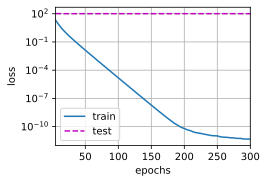

In [40]:
# 用lambd = 0禁用权重衰减后运行这个代码。
# 注意，这里训练误差有了减少，但测试误差没有减少， 这意味着出现了严重的过拟合。
train(lambd=0)

w的L2范数是： 0.07197213172912598


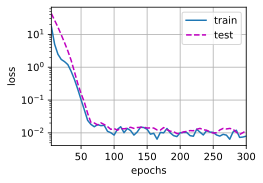

In [41]:
# 使用权重衰减来运行代码。 注意，在这里训练误差增大，但测试误差减小。
# 这正是我们期望从正则化中得到的效果。
train(lambd=3)